In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/SupportVectorMachines

/content/drive/MyDrive/Course Material/Supervised Machine Learning/SupportVectorMachines


# Importing Data

In [ ]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked implies where the traveler mounted from. There are three possible values for Embark
### Southampton, Cherbourg, and Queenstown.

### SibSp is the number of siblings or spouse of a person onboard

###  Parch is the feature contained the number of parents or children each passenger was touring with.

# Check the Number of passengers died.

In [ ]:
train['Survived'].value_counts()  # 0 = died, 1 = lived  since 60% of passengers died

0    549
1    342
Name: Survived, dtype: int64

# Droping Irrelevant Features

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True) # Removing as of no importance
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Checking For Null Values

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Replacing Null Values in "Age" with mean value of "Age"

In [ ]:
train.fillna(value = { "Age" : train['Age'].mean()}, inplace = True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Drop all the rows containing Null Values

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables and dropping first column to avoid multicollinearity

In [ ]:
Sex = pd.get_dummies(train['Sex'],drop_first = True)
Embark = pd.get_dummies(train['Embarked'],drop_first = True)

# Adding dummy variables to original data

In [ ]:
train = pd.concat([train, Sex, Embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


# Removing Sex and Embarked because their dummy variables are created

In [ ]:
train.drop(['Sex', 'Embarked'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extracting features and labels

In [ ]:
X = train.drop(['Survived'], axis = 1).values

In [ ]:
y = train['Survived'].values

# Performing a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

(178, 8)

# Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying SVC

In [ ]:
svc = SVC(kernel = 'rbf', C = 1, gamma = 'scale')
svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

# Calculating Accuracy

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 80.90


# Generating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[95, 14],
       [20, 49]], dtype=int64)

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

# Generating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

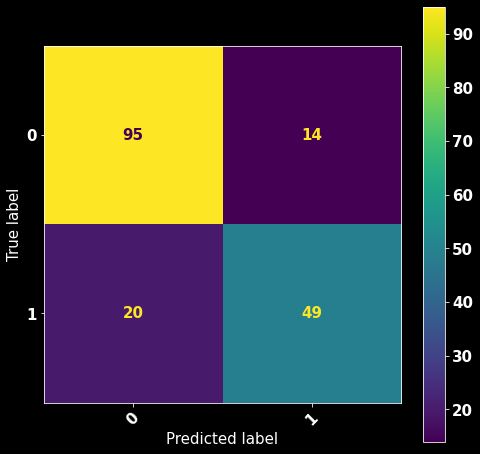

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

# Using Grid Search CV

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle = True)
ksvc = SVC()
param_svc = {'C':[0.01, 0.1, 1,2,3,4,5,10,20,50,100], 'kernel':['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
ksvc_GSCV = GridSearchCV(ksvc, param_grid = param_svc, cv = cv)
ksvc_GSCV.fit(X_train, y_train)

In [ ]:
ksvc_GSCV.best_params_

{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
y_pred_cv = ksvc_GSCV.predict(X_test)

In [ ]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 82.58


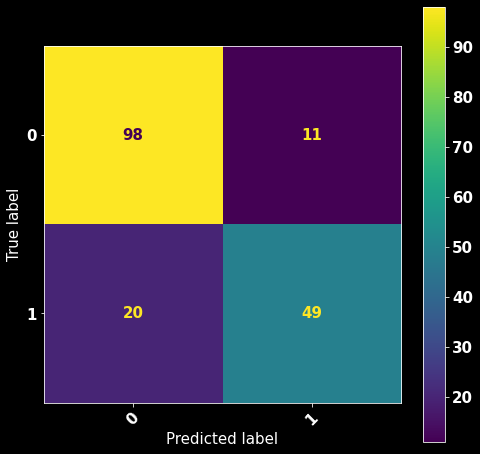

In [ ]:
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()